# SCDT Plot from Saved CSV Results

This notebook loads pre-computed SCDT (Same Class Different Texture) results and creates publication-quality plots.
No need to re-run experiments - just visualize existing data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Path setup
REPO_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
RESULTS_DIR = os.path.join(REPO_ROOT, 'PatrickProject', 'Chart_Generation')

# Load the summary CSV (has pre-calculated statistics)
summary_file = os.path.join(RESULTS_DIR, 'scdt_perclass_summary.csv')

if not os.path.exists(summary_file):
    print(f"File not found: {summary_file}")
    print("Please run SCDT_PerClass_Analysis.ipynb first to generate the data.")
else:
    summary_df = pd.read_csv(summary_file)
    print(f"Loaded data from {summary_file}")
    print(f"Shape: {summary_df.shape}")
    print("\nFirst few rows:")
    print(summary_df.head())
    
    # Check what models and classes we have
    models = summary_df['model'].unique()
    classes_in_data = summary_df['class'].unique()
    print(f"\nModels found: {models}")
    print(f"Number of classes: {len(classes_in_data)}")

Loaded data from c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdt_perclass_summary.csv
Shape: (136, 9)

First few rows:
          model          class  mean_accuracy       std        se      ci95  \
0  cvcl-resnext         abacus       1.000000  0.000000  0.000000  0.000000   
1  cvcl-resnext          apple       0.990000  0.017321  0.010000  0.019600   
2  cvcl-resnext            axe       0.952667  0.008083  0.004667  0.009147   
3  cvcl-resnext  babushkadolls       0.982667  0.015011  0.008667  0.016987   
4  cvcl-resnext          bagel       0.553333  0.022480  0.012979  0.025438   

   n_seeds  total_trials test_type  
0        3          1500      SCDT  
1        3          1500      SCDT  
2        3          1500      SCDT  
3        3          1500      SCDT  
4        3          1500      SCDT  

Models found: ['cvcl-resnext' 'clip-res']
Number of classes: 68


In [2]:
# Read classes directly from the CSV - don't reconstruct stats_results!
# Just use the summary_df dataframe that has all the data we need

# Get unique classes from the CSV
classes = sorted(summary_df['class'].unique())
models_to_test = sorted(summary_df['model'].unique())

print(f"Classes from CSV: {classes}")
print(f"Models from CSV: {models_to_test}")
print(f"Number of classes: {len(classes)}")

Classes from CSV: ['abacus', 'apple', 'axe', 'babushkadolls', 'bagel', 'ball', 'basket', 'bell', 'bird', 'bonzai', 'bread', 'butterfly', 'calculator', 'camera', 'candle', 'cookie', 'doll', 'doorknob', 'dresser', 'dumbell', 'earrings', 'fan', 'goggle', 'grill', 'handbag', 'handgun', 'handheldgame', 'headband', 'helmet', 'horse', 'keyboard', 'lantern', 'lei', 'lipstick', 'lock', 'meat', 'microwave', 'muffin', 'nailpolish', 'ornament', 'pen', 'phone', 'pillow', 'pipe', 'pitcher', 'powerstrip', 'pumpkin', 'rabbit', 'ring', 'rug', 'saddle', 'saltandpeppershake', 'seashell', 'sippycup', 'sodacan', 'stapler', 'stool', 'suitcase', 'telescope', 'tennisracquet', 'toothpaste', 'train', 'tree', 'tricycle', 'trophy', 'trumpet', 'vase', 'wineglass']
Models from CSV: ['clip-res', 'cvcl-resnext']
Number of classes: 68


Plotting 68 classes from CSV


C:\Users\jbats\AppData\Local\Temp\ipykernel_11908\1916309719.py:143: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\jbats\AppData\Local\Temp\ipykernel_11908\1916309719.py:165: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


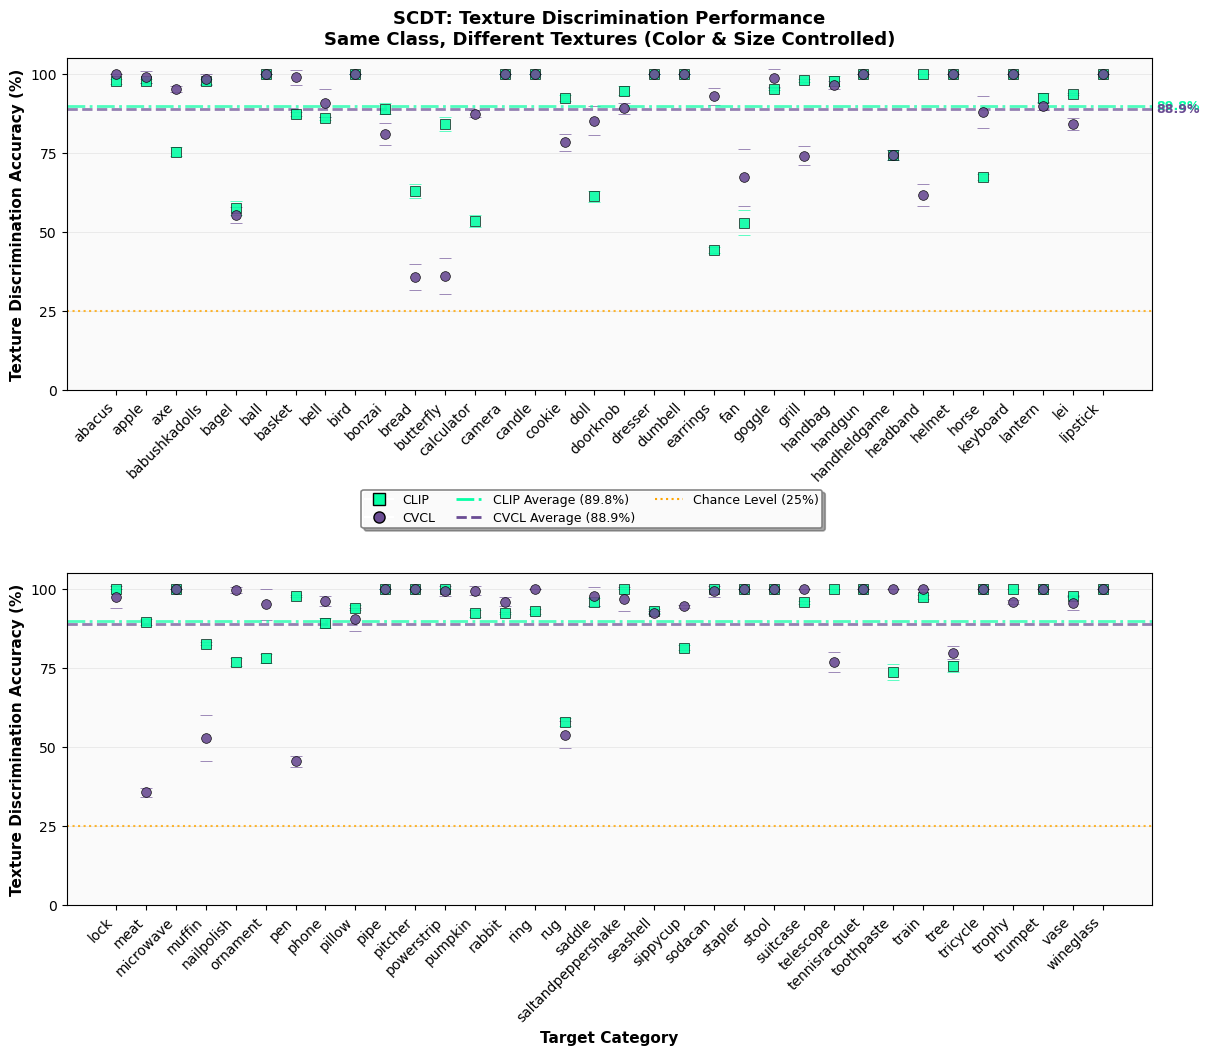

Saved SCDT plots from CSV data to:
  - c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdt_perclass_from_csv.png
  - c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdt_perclass_from_csv.pdf


In [3]:
# Create publication-quality visualization using ONLY CSV data
fig = plt.figure(figsize=(14, 11))

# Create subplots with space for legend in between
ax1 = plt.subplot2grid((20, 1), (0, 0), rowspan=8)
ax2 = plt.subplot2grid((20, 1), (12, 0), rowspan=8)

# Use classes directly from CSV
classes = sorted(summary_df['class'].unique())
models_to_test = sorted(summary_df['model'].unique())

print(f"Plotting {len(classes)} classes from CSV")

# Split classes into two groups
mid_point = len(classes) // 2
classes_first_half = classes[:mid_point]
classes_second_half = classes[mid_point:]

# Define colors and styles (SCDT-specific colors to test texture discrimination)
colors = {
    'cvcl-resnext': '#6a4c93',  # Purple - CVCL may have advantage
    'clip-res': '#06ffa5'  # Teal - CLIP may struggle with texture
}
markers = {
    'cvcl-resnext': 'o',
    'clip-res': 's'  # Square for CLIP
}
avg_line_styles = {
    'cvcl-resnext': '--',
    'clip-res': '-.'
}

# Short display labels for the legend
short_labels = {
    'cvcl-resnext': 'CVCL',
    'clip-res': 'CLIP'
}

# Store legend elements globally
legend_elements = []

# Function to plot data on an axis - USING CSV DATA DIRECTLY
def plot_on_axis(ax, class_subset, is_first=False):
    x_pos = np.arange(len(class_subset))
    
    # Plot each model using data from CSV
    for model_name in models_to_test:
        # Get data from CSV for this model and these classes
        means = []
        errors = []
        for cls in class_subset:
            row = summary_df[(summary_df['model'] == model_name) & (summary_df['class'] == cls)]
            if not row.empty:
                means.append(row.iloc[0]['mean_accuracy'] * 100)
                errors.append(row.iloc[0]['ci95'] * 100)
            else:
                # If no data for this class/model combo, use 0
                means.append(0)
                errors.append(0)
        
        ax.errorbar(x_pos, means, yerr=errors, 
                    label=None,
                    color=colors[model_name],
                    marker=markers[model_name],
                    markersize=7,
                    linewidth=0,
                    capsize=4,
                    capthick=1.5,
                    alpha=0.9,
                    markeredgecolor='black',
                    markeredgewidth=0.5)
    
    # Add chance line
    ax.axhline(y=25, color='#ffa500', linestyle=':', alpha=0.8, linewidth=1.5)
    
    # Calculate average lines from CSV data
    all_classes_means = {}
    for model_name in models_to_test:
        model_data = summary_df[summary_df['model'] == model_name]
        all_classes_means[model_name] = model_data['mean_accuracy'].mean() * 100
    
    for model_name in models_to_test:
        avg_performance = all_classes_means[model_name]
        ax.axhline(y=avg_performance, 
                  color=colors[model_name], 
                  linestyle=avg_line_styles[model_name], 
                  alpha=0.7, 
                  linewidth=2)
        
        if is_first:
            ax.text(len(class_subset) + 0.8, avg_performance, 
                   f'{avg_performance:.1f}%', 
                   fontsize=9, 
                   color=colors[model_name], 
                   va='center',
                   fontweight='bold')
    
    # Formatting (SCDT-specific y-label)
    ax.set_ylabel('Texture Discrimination Accuracy (%)', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(class_subset, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 105)
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.set_facecolor('#fafafa')
    
    # Create legend elements (only once)
    global legend_elements
    if is_first:
        from matplotlib.lines import Line2D
        legend_elements = []
        
        for model_name in models_to_test:
            legend_elements.append(
                Line2D([0], [0], marker=markers[model_name], color='w', 
                      markerfacecolor=colors[model_name], markeredgecolor='black',
                      markersize=8, label=short_labels[model_name])
            )
        
        for model_name in models_to_test:
            avg_val = all_classes_means[model_name]
            legend_elements.append(
                Line2D([0], [0], color=colors[model_name], 
                      linestyle=avg_line_styles[model_name], linewidth=2,
                      label=f'{model_name.upper().split("-")[0]} Average ({avg_val:.1f}%)')
            )
        
        legend_elements.append(
            Line2D([0], [0], color='#ffa500', linestyle=':', linewidth=1.5,
                  label='Chance Level (25%)')
        )

# Plot both halves (SCDT-specific titles)
plot_on_axis(ax1, classes_first_half, is_first=True)
ax1.set_title('SCDT: Texture Discrimination Performance\nSame Class, Different Textures (Color & Size Controlled)', 
              fontsize=13, fontweight='bold', pad=10)

plot_on_axis(ax2, classes_second_half, is_first=False)
ax2.set_xlabel('Target Category', fontsize=11, fontweight='bold')

# --- Legend centered between subplots (EXACT SAME AS CLASS VERSION) ---
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)  # keep spacing between the two axes

legend = fig.legend(
    handles=legend_elements,
    loc='center',
    bbox_to_anchor=(0.5, 0.47),   # (x, y) in figure coords
    ncol=3,
    fontsize=9,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.95,
    borderpad=0.3,                # tighter box padding
    labelspacing=0.4,             # tighter line spacing
    handlelength=2.2,
    columnspacing=1.6
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_linewidth(1.2)

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

plt.savefig(os.path.join(RESULTS_DIR, 'scdt_perclass_from_csv.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig(os.path.join(RESULTS_DIR, 'scdt_perclass_from_csv.pdf'), bbox_inches='tight', facecolor='white')
plt.show()

print(f"Saved SCDT plots from CSV data to:")
print(f"  - {os.path.join(RESULTS_DIR, 'scdt_perclass_from_csv.png')}")
print(f"  - {os.path.join(RESULTS_DIR, 'scdt_perclass_from_csv.pdf')}")